<a href="https://colab.research.google.com/github/ppkgtmm/emotion/blob/main/goemo_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
cols = ['text','target']

In [4]:
data = pd.read_csv('/content/drive/MyDrive/emotion/data/goemotions.csv')[cols]
data.sample(5)

,text,target
9677,Wow. Did not realize [NAME] was a top 20,admiration
48699,I havent done a full rewatch since the finale....,confusion
116028,I believe you copied and paste from somewhere ...,realization
12894,El oh el that was fucking funny,amusement
50996,Can you stop shilling for Russia every damn ti...,confusion


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164954 entries, 0 to 164953
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    164954 non-null  object
 1   target  164954 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [7]:
data.isnull().any()

text      False
target    False
dtype: bool

In [9]:
target_dist = data.groupby('target').count().reset_index()
target_dist['proportion'] = target_dist['text'] / sum(list(target_dist['text']))
target_dist.head()

,target,text,proportion
0,admiration,9912,0.060089
1,amusement,5180,0.031403
2,anger,5644,0.034216
3,annoyance,10024,0.060768
4,approval,13235,0.080234


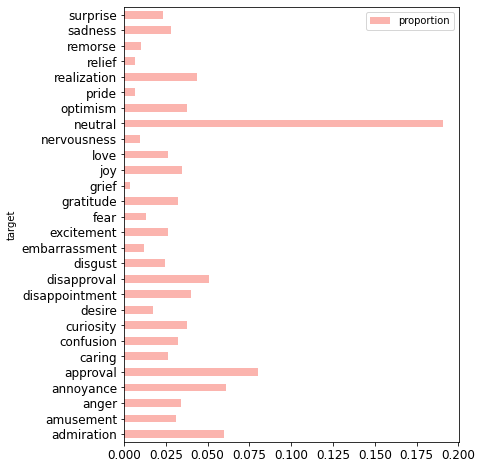

In [11]:
target_dist.plot(x='target', y='proportion', kind='barh', rot=0, \
                 colormap='Pastel1', fontsize=12, figsize=(6,8))